## Zadanie 4
### Analiza zbioru liczb rysowanych na plótnie 8x8

In [1]:
from Lista2Zadanie4.DigitsProcessing import *
from utils import *
import random

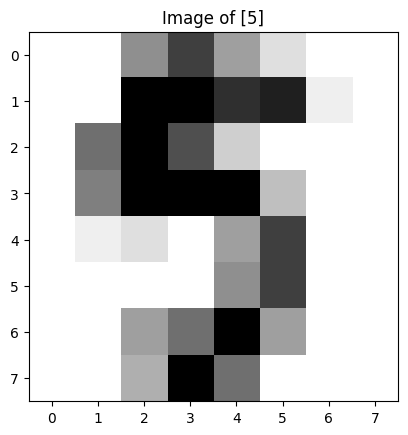

In [2]:
x_train, y_train = load_dataset('train.txt')

# Przyklad liczby, procesowanej
plot_number_using_vector(x_train[13], y_train[13])


<br>
<br>
<br>
<br>
<br>
<br>

## Zainicjalizowanie sieci neuronowej

In [3]:
y_train = one_hot_encode(y_train)
network = (
    NeuralNetwork(
        hidden_layer=[
            Relu(weights=[random.uniform(-1, 1)* 0.01 for _ in range(64)], bias=random.uniform(-1, 1)* 0.01) for _ in range(64)
        ],
        output_layer=[Softmax(weights=[random.uniform(-1, 1)* 0.01 for _ in range(64)], bias=random.uniform(-1, 1)* 0.01) for _ in range(10)],
        learnign_rate=0.001))

network.train(x_train, y_train, 10)



iteracja 0- wartość f.kosztu: 3297.416019867045
iteracja 1- wartość f.kosztu: 637.7505448194207
iteracja 2- wartość f.kosztu: 474.7798281684107
iteracja 3- wartość f.kosztu: 395.7333352230091
iteracja 4- wartość f.kosztu: 345.440208232386
iteracja 5- wartość f.kosztu: 309.28825080551377
iteracja 6- wartość f.kosztu: 281.93297006919624
iteracja 7- wartość f.kosztu: 258.43830759133664
iteracja 8- wartość f.kosztu: 238.97392758488198
iteracja 9- wartość f.kosztu: 220.51668732710448


In [4]:
print(y_train[12])
network.forward_propagation(x_train[12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


[np.float64(6.415843838537306e-05),
 np.float64(0.0004773137725668477),
 np.float64(4.943415108213888e-10),
 np.float64(4.1553783653766323e-07),
 np.float64(0.0058137793196339944),
 np.float64(0.0013993912381167525),
 np.float64(1.059718370012933e-07),
 np.float64(0.001648687655630938),
 np.float64(0.0011964539212049033),
 np.float64(0.9893996936504461)]

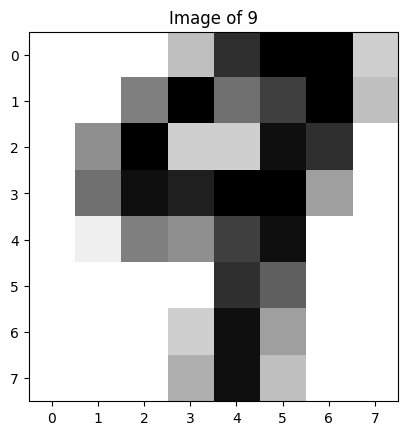

In [5]:
plot_number_using_vector(x_train[12], list(y_train[12]).index(max(y_train[12])))


In [6]:
test_x, test_y = load_data_from_image("test.png", 5)
network.forward_propagation(test_x)

[np.float64(0.08305363474485511),
 np.float64(0.09160541078644462),
 np.float64(0.0855227761409988),
 np.float64(0.10526479549026846),
 np.float64(0.07133580705900684),
 np.float64(0.19975197504127004),
 np.float64(0.11624553259448865),
 np.float64(0.0738907527201109),
 np.float64(0.0886865755904793),
 np.float64(0.08464273983207715)]

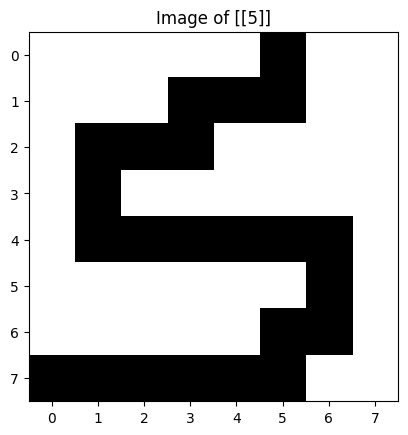

In [7]:
plot_number_using_vector(test_x, test_y)

In [8]:
test_x, test_y = load_dataset("test.txt")

acc_guesses = 0
for x, y in zip(test_x, test_y):
    prediction = network.forward_propagation(x)
    predicted_label = prediction.index(max(prediction))
    if predicted_label == y[0]:
        acc_guesses += 1

In [9]:
print(f'accuracy: {acc_guesses/len(test_x)*100:.1f}%')

accuracy: 95.5%
